<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Bank_Note_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyforest

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pyforest import *

In [4]:
lazy_imports()

['import statistics',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import re',
 'from sklearn.impute import SimpleImputer',
 'import keras',
 'from sklearn.linear_model import LinearRegression',
 'from openpyxl import load_workbook',
 'from sklearn.linear_model import Lasso',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.linear_model import Ridge',
 'import xgboost as xgb',
 'import spacy',
 'import pydot',
 'import torch',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.ensemble import RandomForestRegressor',
 'import datetime as dt',
 'from pathlib import Path',
 'from fbprophet import Prophet',
 'import matplotlib.pyplot as plt',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import tqdm',
 'import seaborn as sns',
 'import bokeh',
 'import nltk',
 'import os',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.model_selection import RandomizedSearchCV',
 

In [5]:
df = pd.read_csv("/content/BankNote_Authentication.csv")

<IPython.core.display.Javascript object>

In [6]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
df.shape

(1372, 5)

In [8]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [9]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

**Visualization**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 400x400 with 0 Axes>

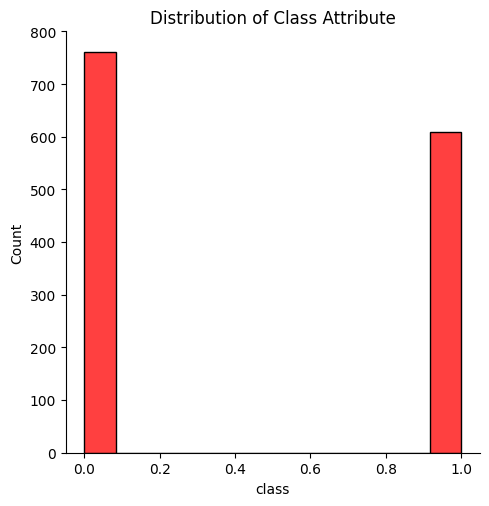

In [11]:
plt.figure(figsize=(4,4))
sns.displot(df['class'], color='red')
plt.title('Distribution of Class Attribute')
plt.show()

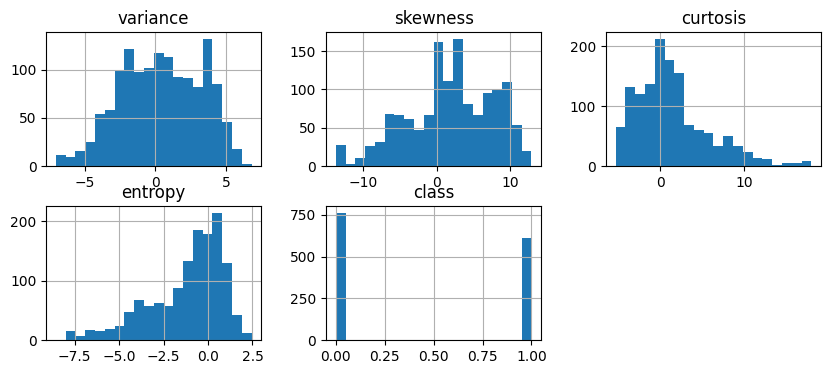

In [12]:
df.hist(bins=20, figsize=(10,4), layout=(2,3));

<IPython.core.display.Javascript object>

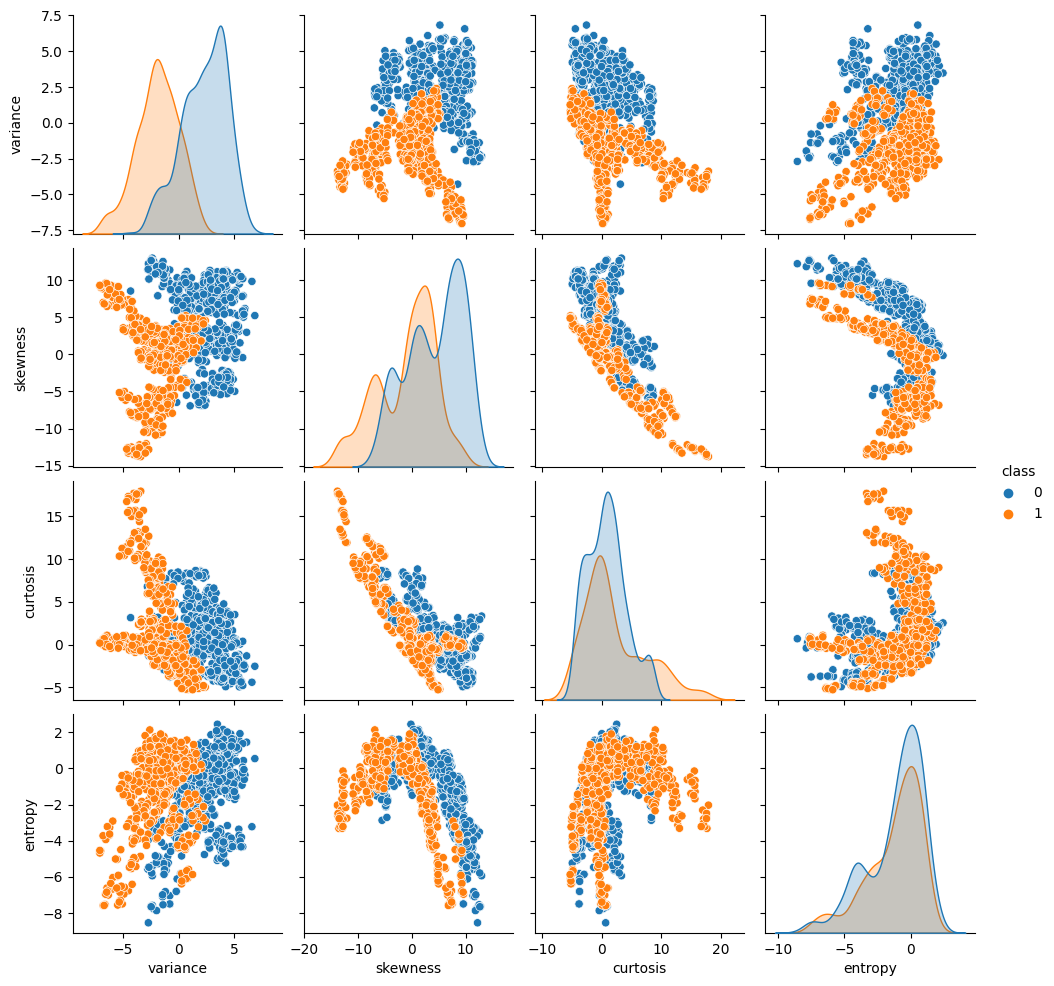

In [13]:
sns.pairplot(df,hue='class')

Preparing Data to build the Model.

In [14]:
X = df.drop('class', axis =1)
y = df['class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<IPython.core.display.Javascript object>

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [19]:
classifier = LogisticRegression(solver='liblinear', random_state=1)

In [20]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [21]:
accuracies = cross_val_score(estimator = classifier, X=X_train, y = y_train, cv=10)

In [22]:
print("Accuracies:\n", accuracies)


Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [23]:
print("Mean Accuracy:", accuracies.mean())

Mean Accuracy: 0.9835863219349459


In [24]:
prediction = classifier.predict(X_test)

In [25]:
prediction

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [26]:
from sklearn.metrics import confusion_matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

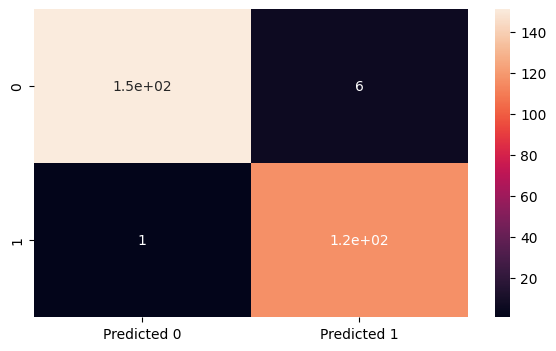

In [27]:
cm = confusion_matrix(y_test, prediction, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True)

## Support Vector Classifier

In [28]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
svm_accuracies = cross_val_score(estimator = svm_classifier, X=X_train, y = y_train, cv=10)
print("Accuracies:\n", svm_accuracies)

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [30]:
print("Mean Accuracy:", svm_accuracies.mean())

Mean Accuracy: 0.9854045037531277


In [31]:
svm_prediction = svm_classifier.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

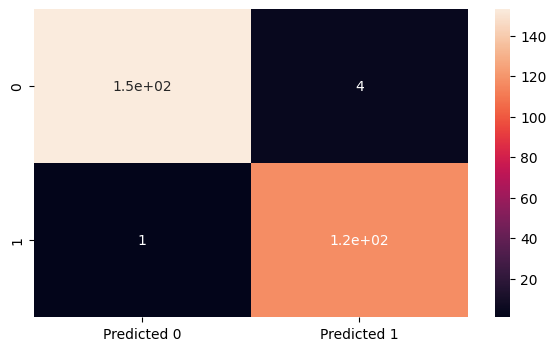

In [32]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_prediction, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True)

In [33]:
rbf_classifier = SVC(kernel='rbf')

rbf_classifier.fit(X_train, y_train)

rbf_accuracies = cross_val_score(estimator = rbf_classifier, X=X_train, y = y_train, cv=10)
print("Accuracies:\n", svm_accuracies)

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [34]:
rbf_prediction = rbf_classifier.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

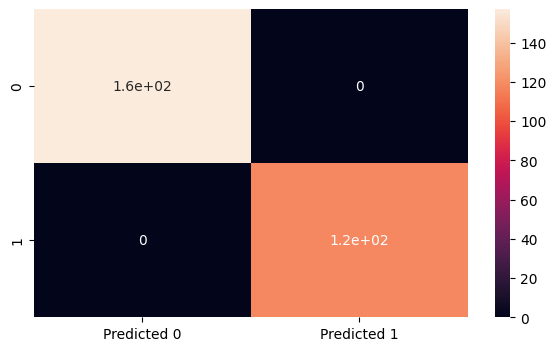

In [35]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rbf_prediction, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True)

## RandomForest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=1)

rfc_classifier.fit(X_train, y_train)

rfc_accuracies = cross_val_score(estimator = rfc_classifier, X=X_train, y= y_train, cv=10)

print("Accuracies:\n", rfc_accuracies)

Accuracies:
 [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [38]:
print("Mean Accuracy:", rfc_accuracies.mean())

Mean Accuracy: 0.9927272727272728


In [39]:
rfc_prediction = rfc_classifier.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

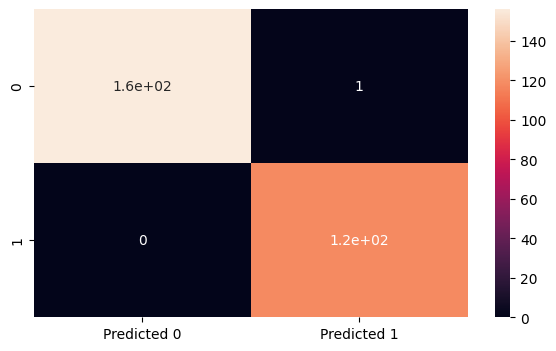

In [40]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_prediction, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True)

## KNeighborsClassifer

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size':[2,5,7,9,11],
              'n_neighbors':[2,5,7,9,11],
              'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [42]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [43]:
KNN = KNeighborsClassifier(n_neighbors=2, p=1,leaf_size=2)

In [44]:
#call KNeighbors algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [45]:
KNN_pred = KNN.predict(X_test)

In [46]:
KNN_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

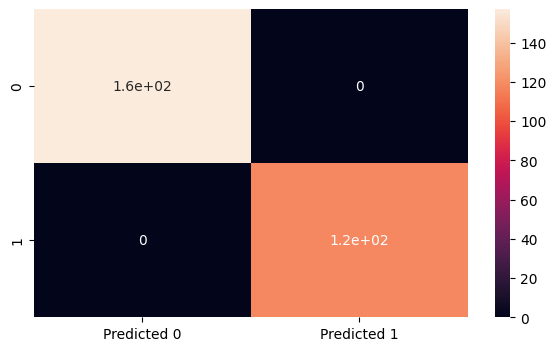

In [47]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, KNN_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True)

In [48]:
KNN_accuracies = cross_val_score(estimator = KNN, X=X_train, y= y_train, cv=10)

print("Accuracies:\n", rfc_accuracies)

Accuracies:
 [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [49]:
print("Mean Accuracy:", KNN_accuracies.mean())

Mean Accuracy: 0.9972727272727273


**Multilayer Perceptron**

In [50]:
from sklearn.neural_network import MLPClassifier

multi_classifier = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver = 'sgd', verbose=10, random_state=21, tol=0.000000001)

In [51]:
multi_classifier.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
Iteration 3001, loss = 0.00210422
Iteration 3002, loss = 0.00210327
Iteration 3003, loss = 0.00210249
Iteration 3004, loss = 0.00210162
Iteration 3005, loss = 0.00210064
Iteration 3006, loss = 0.00209983
Iteration 3007, loss = 0.00209866
Iteration 3008, loss = 0.00209775
Iteration 3009, loss = 0.00209693
Iteration 3010, loss = 0.00209610
Iteration 3011, loss = 0.00209507
Iteration 3012, loss = 0.00209421
Iteration 3013, loss = 0.00209323
Iteration 3014, loss = 0.00209230
Iteration 3015, loss = 0.00209141
Iteration 3016, loss = 0.00209054
Iteration 3017, loss = 0.00208984
Iteration 3018, loss = 0.00208863
Iteration 3019, loss = 0.00208777
Iteration 3020, loss = 0.00208675
Iteration 3021, loss = 0.00208586
Iteration 3022, loss = 0.00208514
Iteration 3023, loss = 0.00208415
Iteration 3024, loss = 0.00208311
Iteration 3025, loss = 0.00208239
Iteration 3026, loss = 0.00208135
Iteration 3027, loss = 0.00208042
Iteration 3028, loss = 0.002079

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=21,
              solver='sgd', tol=1e-09, verbose=10)

In [52]:
MLP_pred = multi_classifier.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

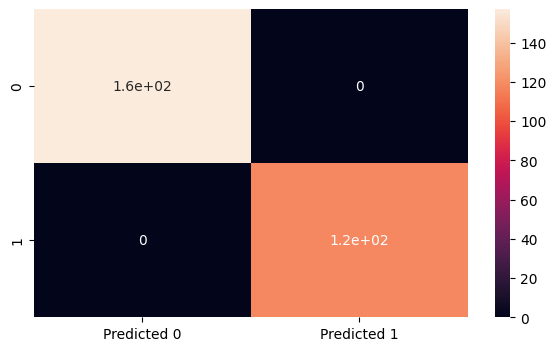

In [53]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, MLP_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True)

**Printing each algorithm and the accuracy score**

In [54]:
print("Logistic Regression:", accuracies.mean())
print("Support Vector Machine (Kernel=liblinear):", svm_accuracies.mean())
print("Support Vector Machine (Kernel=rbf):", rbf_accuracies.mean())
print("RandomForestClassifier:", rfc_accuracies.mean())
print("KNeighborsClassifer:", KNN_accuracies.mean())
print("Multilayer Perceptron:{}%".format(100))

Logistic Regression: 0.9835863219349459
Support Vector Machine (Kernel=liblinear): 0.9854045037531277
Support Vector Machine (Kernel=rbf): 1.0
RandomForestClassifier: 0.9927272727272728
KNeighborsClassifer: 0.9972727272727273
Multilayer Perceptron:100%
